#### Clase Complementaria Martes 28

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [3]:
x = np.array([20, 45, 80, 100, 160, 175, 190, 215, 223, 257,289,300,358,400,428,460,489])
y = np.array([10, 19, 27, 38, 47, 56, 63, 74, 87, 96, 110, 126,148,159,170,200,216])

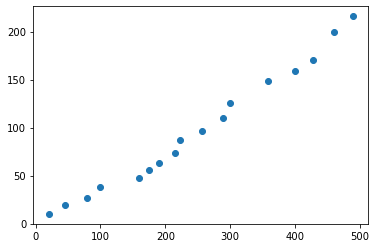

In [4]:
plt.scatter(x,y)

In [13]:
def descripcion_modelo(x, m, b):
    n = x.shape[0]
    print(n)
    y_est = np.zeros(n)
    
    for i in range(n):
        y_est[i] = m*x[i]+b
    
    return y_est

In [20]:
m = 0.4
b = 0.1
y_est = descripcion_modelo(x, 1, 2)

17


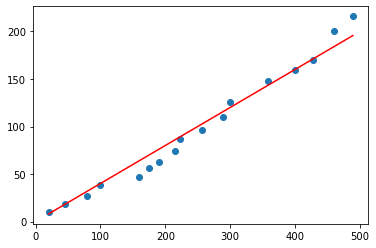

In [25]:
plt.scatter(x,y)
plt.plot(x, y_est, c = 'r')


#### Funcion de Costo


$$J(m,b) = \frac{1}{2n} \sum\limits_{i = 0}^{n-1} (f_{m,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

In [23]:
def funcion_costo(x,y,m,b):
    n = x.shape[0]
    suma_costos = 0
    for i in range(n):
        y_est[i] = m * x[i] + b
        costo = (y_est[i] - y[i])**2
        suma_costos+=costo
    costo_total = (1/(2*n)) * suma_costos
    return costo_total

In [24]:
funcion_costo(x,y,m,b)

48.65205882352939

#### Gradiente Descendente (GD)

Se repite hasta alcanzar la convergencia

$$ m = m -  \alpha \frac{\partial J(m,b)}{\partial m} $$


$$ b = b -  \alpha \frac{\partial J(m,b)}{\partial b} $$

El Gradiente se define por:

$$ 
\begin{align}

\frac{\partial J(m,b)}{\partial m}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{m,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\

\frac{\partial J(m,b)}{\partial b}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{m,b}(x^{(i)}) - y^{(i)}) \tag{5}\\

\end{align} 
$$

In [30]:
def gradiente(x,y,m,b):
    n = x.shape[0]
    
    # derivada parcial de la funcion de costo con respecto a m
    dj_dm = 0
    # derivada parcial de la funcion de costo con respecto a m
    dj_db = 0
    
    y_est = np.zeros(n)
    
    for i in range(n):
        y_est[i] = m*x[i]+b
        
        dj_dm_i = (y_est[i]-y[i]) * x[i]
        dj_db_i = (y_est[i]-y[i])
        
        dj_dm += dj_dm_i
        dj_db += dj_db_i
        
    dj_dm = dj_dm/n
    dj_db = dj_db/n
    
    return dj_dm, dj_db

In [31]:
def gradienteDescendente(x, y, m_inicial, b_inicial, alpha, iteraciones, funcion_costo, funcion_gradiente):
    b = b_inicial
    m = m_inicial
    
    for i in range(iteraciones):
        dj_dm, dj_db = gradiente(x, y, m, b)
        
        m = m - alpha * dj_dm
        b = b - alpha * dj_db
        
    return m, b

In [47]:
m_inicial = 0.4
b_inicial = 0.1
alpha = 0.00001
iteraciones = 200 

m,b = gradienteDescendente(x, y, m_inicial, b_inicial, alpha, iteraciones, funcion_costo, gradiente)

In [48]:
m

0.40361833240787154

In [49]:
b

0.09455501240292796